<a href="https://colab.research.google.com/github/AayushTalekar/ML/blob/master/Experiments/Exp1_J054_06_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np

In [87]:
depression = pd.read_csv('/content/depression.csv')
actor_age = pd.read_csv('/content/actor_age.csv')
friends = pd.read_csv('/content/friends.csv')
grad_data = pd.read_csv('/content/grad_data.csv')
ratings = pd.read_csv('/content/ratings.csv')

#Q1. What are the categorical variables in this dataset?

In [3]:
depression

,Unnamed: 0,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,1,0,1,36.143002,211,33,1
1,2,1,1,0,105.142998,176,49,1
2,3,1,1,0,74.570999,191,50,1
3,4,1,0,1,49.714001,206,29,2
4,5,1,0,0,14.429000,63,29,1
...,...,...,...,...,...,...,...,...
104,105,6,2,1,20.857000,207,43,1
105,106,6,2,1,18.285999,102,29,1
106,107,6,1,1,31.857000,154,28,1
107,108,6,1,1,22.000000,203,51,1


In [6]:
def gender(x):
  if x == 1:
    x = 'Male'
    return x
  else:
    x = 'Female'
    return x

In [9]:
depression.head(10)

,Unnamed: 0,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,1,0,1,36.143002,211,33,Male
1,2,1,1,0,105.142998,176,49,Male
2,3,1,1,0,74.570999,191,50,Male
3,4,1,0,1,49.714001,206,29,Female
4,5,1,0,0,14.429000,63,29,Male
5,6,1,2,1,5.000000,70,30,Female
6,7,1,0,0,104.857002,55,56,Male
7,8,1,2,1,2.857000,512,48,Male
8,9,1,2,0,102.429001,162,22,Female
9,10,1,2,1,55.714001,306,61,Female


In [7]:
depression['Gender'] = depression['Gender'].apply(lambda x: gender(x))

In [8]:
depression['Gender']

0        Male
1        Male
2        Male
3      Female
4        Male
        ...  
104      Male
105      Male
106      Male
107      Male
108      Male
Name: Gender, Length: 109, dtype: object

In [82]:
depression.dtypes

Unnamed: 0      int64
Hospt           int64
Treat           int64
Outcome         int64
Time          float64
AcuteT          int64
Age             int64
Gender          int64
dtype: object

The categorical variables in the dataset are:

*   Hospt
*   Treat

*   Outcome
*   Gender





#Q2. What are the quantitative variables in this dataset?

The quantitative variables in this dataset are:


*   Time
*   Age

*   AcuteT





#Q3. Describe the distribution of the variable "friends" in dataset - Survey that asked 1,200 U.S. college students about their body perception

In [60]:
import plotly.express as px
import plotly.graph_objects as go

In [28]:
friends

,Unnamed: 0,Friends
0,1,No difference
1,2,No difference
2,3,No difference
3,4,No difference
4,5,No difference
...,...,...
1195,1196,Same sex
1196,1197,Same sex
1197,1198,Same sex
1198,1199,Same sex


In [42]:
friends.drop('Unnamed: 0', axis=1, inplace=True)

In [44]:
def fri_count(x):
  if x == 'No difference':
    x = 1
  elif x == 'Opposite sex':
    x = 2
  else:
    x = 3
  return x

In [45]:
friends['Friends'] = friends['Friends'].apply(lambda x: fri_count(x))

In [56]:
no_diff =  sum(friends['Friends']==1)
no_diff

602

In [57]:
opp_sex = sum(friends['Friends']==2)
opp_sex

434

In [58]:
same_sex = sum(friends['Friends']==3)
same_sex

164

In [59]:
labels = ['No difference', 'Opposite Sex', 'Same Sex']
values = [no_diff, opp_sex, same_sex]

In [62]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Friends')
fig.show()


The above pie chart shows that the distribution of choice of friends is not equal among the students. 50.2% of the students do not find it difficult to make friends with both genders. 36.2% of the students preffered to make friends with their opposite gender and 13.7% of the students were comfortable with having friends of the same gender

In [67]:
import seaborn as sns

In [68]:
sns.set_style('darkgrid')

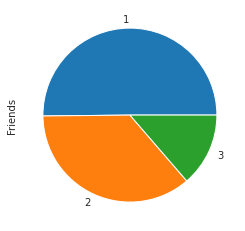

In [69]:
friends.Friends.value_counts().plot(kind='pie')

#Q4. Describe the distribution of the ages of the Best Actor Oscar winners. Be sure to address shape, center, spread and outliers.

In [70]:
actor_age

,Unnamed: 0,Age
0,1,43
1,2,42
2,3,48
3,4,49
4,5,56
5,6,38
6,7,60
7,8,30
8,9,40
9,10,42


In [71]:
actor_age.drop('Unnamed: 0', axis=1, inplace=True)

In [72]:
actor_age

,Age
0,43
1,42
2,48
3,49
4,56
5,38
6,60
7,30
8,40
9,42


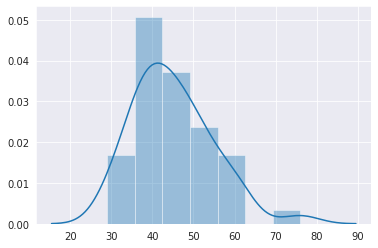

In [78]:
sns.distplot(actor_age)

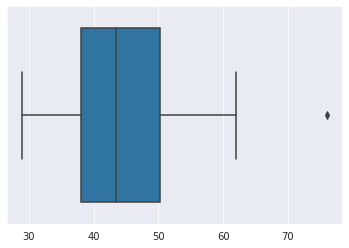

In [83]:
sns.boxplot(actor_age)

In [79]:
actor_age.describe()

,Age
count,44.000000
mean,44.977273
std,9.749153
min,29.000000
25%,38.000000
50%,43.500000
75%,50.250000
max,76.000000




*   Shape: The shape of the distribution is skewed towards the right which means that the Oscar winners are relatively young.
*   Center: The mean of the age of the Oscar winners is 44.97 years. The distribution has a median of 43.5 years which means that 50% of the distribution is centered at 43.5 years and 50% of the Oscar winners win the Oscar before reaching the age of 43.5 years.
*   Spread: The minimum and maximum age of Oscar winners is 29 years and 76 years which shows that the range of the age is 47 years. The standard deviation of the ages is 9.74 
*   Outliers: There is an outlier at age 76 years.





#Q5. Getting information from the output: a. How many observations are in this data set? b. What is the mean age of the actors who won the Oscar? c. What is the five-number summary of the distribution? (Dataset - Best Actor Oscar winners (1970-2013))




1.   44
2.   44.97
3.   count	44.000000
      mean	44.977273
      std	9.749153
      min	29.000000
      25%	38.000000
      50%	43.500000
      75%	50.250000
      max	76.000000



#Q6. Get information from the five-number summary: a. Half of the actors won the Oscar before what age? b. What is the range covered by all the actors' ages? c. What is the range covered by the middle 50% of the ages? (Dataset - Best Actor Oscar winners (1970-2013))

In [85]:
actor_age.describe()

,Age
count,44.000000
mean,44.977273
std,9.749153
min,29.000000
25%,38.000000
50%,43.500000
75%,50.250000
max,76.000000




1.   43.5
2.   47 years
3.   12.25




#Q7. What are the standard deviations of the three rating distributions? Was your intuition correct? (Dataset - 27 students in the class were asked to rate the instructor on a number scale of 1 to 9)


In [88]:
ratings

,Unnamed: 0,Class.I,Class.II,Class.III
0,1,1,1,1
1,2,1,1,2
2,3,5,1,3
3,4,5,1,4
4,5,5,1,5
5,6,5,1,6
6,7,5,1,7
7,8,5,1,8
8,9,5,1,9
9,10,5,1,1


In [94]:
ratings.drop('Unnamed: 0', axis=1, inplace=True)

In [97]:
ratings.describe()

,Class.I,Class.II,Class.III
count,27.000000,27.0,27.000000
mean,5.000000,5.0,5.000000
std,1.568929,4.0,2.631174
min,1.000000,1.0,1.000000
25%,5.000000,1.0,3.000000
50%,5.000000,5.0,5.000000
75%,5.000000,9.0,7.000000
max,9.000000,9.0,9.000000


The standard deviations are:


1.   Class 1 = 1.56
2.   Class 2 = 4
3.   Class 3 = 2.63


#Q8. Assume that the average rating in each of the three classes is 5 (which should be visually reasonably clear from the histograms), and recall the interpretation of the SD as a "typical" or "average" distance between the data points and their mean. Judging from the table and the histograms, which class would have the largest standard deviation, and which one would have the smallest standard deviation? Explain your reasoning (Dataset - 27 students in the class were asked to rate the instructor on a number scale of 1 to 9)

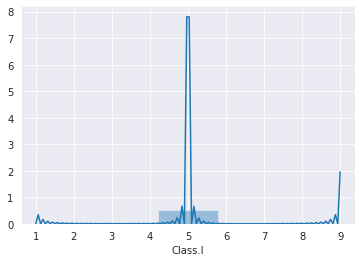

In [100]:
sns.distplot(ratings['Class.I'])

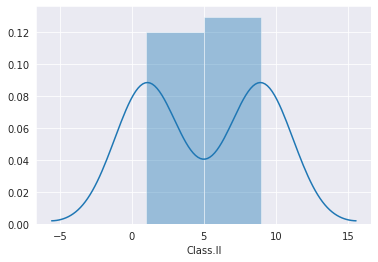

In [101]:
sns.distplot(ratings['Class.II'])

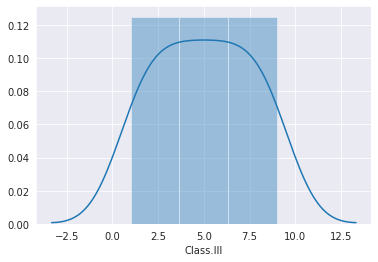

In [102]:
sns.distplot(ratings['Class.III'])

The ratings for class 1 are heavily located around 5 which is also its mean, so there is very less standard deviation in class 1. In class 2, there are larger observations around 0 and 10 thus there is a lot of distance between the mean and the observations showing a highed standard deviation. In class 3, there is a gradual decrease in the distance between the mean and the observations. Class 1 will have the smallest standard deviation and Class 2 will have the largest standard deviation. 